<center><strong><h1>Exploratory Data Analysis (EDA) on Barisal_Weather_Combined Dataset</center></strong></h1>

---


<center><strong><h2> Introduction</center></strong></h2>

<center>In this notebook, we will perform Exploratory Data Analysis (EDA) on the "Barosal_Weather_Combined" dataset. EDA is a crucial first step in the data analysis process, helping us understand the data's structure, distribution, and relationships. We will explore the dataset and gain insights into its key characteristics.</center>

---

<center><strong><h2>Dataset Information</center></strong></h2>

Source:
[BangladeshChapter_FloodGuard](https://dagshub.com/Omdena/BangladeshChapter_FloodGuard/src/main/src/data/Raj_Weather_combined/Barisal_Weather_combined.csv)

Purpose:

Dataset combines weather-related information from various sources and data collection-preprocessing team scraped this data.For

EDA,Model Developnment and Deployment.

---


<center><strong><h2>Setup & Importing Libraries</center></strong></h2>


In [39]:
!pip install plotly

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sbs

In [41]:
file=pd.read_csv("Barisal_Weather_combined.csv")
file.drop("Unnamed: 0_x",axis=1,inplace=True)
file.head()

,datetime,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
0,2023-08-17,Barisal,34.0,27.3,30.0,45.0,31.4,36.7,25.8,79.2,...,61,31.8,26.7,29.1,35.1,2.8,2.8,9.0,18.9,3.99
1,2023-08-16,Barisal,34.3,27.1,30.2,45.2,30.6,37.4,26.1,79.9,...,63,32.4,26.6,29.0,36.1,18.3,18.3,16.0,8.9,3.37
2,2023-08-15,Barisal,33.6,26.9,29.6,43.8,30.0,35.8,25.6,80.5,...,63,31.6,26.2,28.1,34.7,15.3,15.3,14.0,10.3,3.11
3,2023-08-14,Barisal,31.9,25.1,28.3,38.0,25.1,32.3,25.2,83.8,...,63,31.1,25.7,28.1,34.6,22.9,22.9,16.0,8.2,3.33
4,2023-08-13,Barisal,28.3,25.6,26.8,35.0,25.6,29.4,25.6,92.9,...,63,30.7,25.7,27.0,33.4,15.4,15.4,18.0,8.4,1.84


In [42]:
file.dtypes

datetime                       object
name                           object
tempmax_x                     float64
tempmin_x                     float64
temp                          float64
feelslikemax                  float64
feelslikemin                  float64
feelslike                     float64
dew                           float64
humidity                      float64
precip                        float64
precipprob                    float64
precipcover                   float64
preciptype                     object
snow                          float64
snowdepth                     float64
windgust                      float64
windspeed_x                   float64
winddir                       float64
sealevelpressure              float64
cloudcover                    float64
visibility                    float64
solarradiation                float64
solarenergy                   float64
uvindex                         int64
severerisk                    float64
sunrise     

In [43]:
file.shape

(3730, 46)

<h3>Data Cleaning:</h3>

Identifying and Removing Outliers:

---

For numerical columns like tempmax_x, tempmin_x, temp, feelslikemax, and others:
Are there any outliers (box plot)?

Note: I am checking outliers for all numerical columns not going for specific:

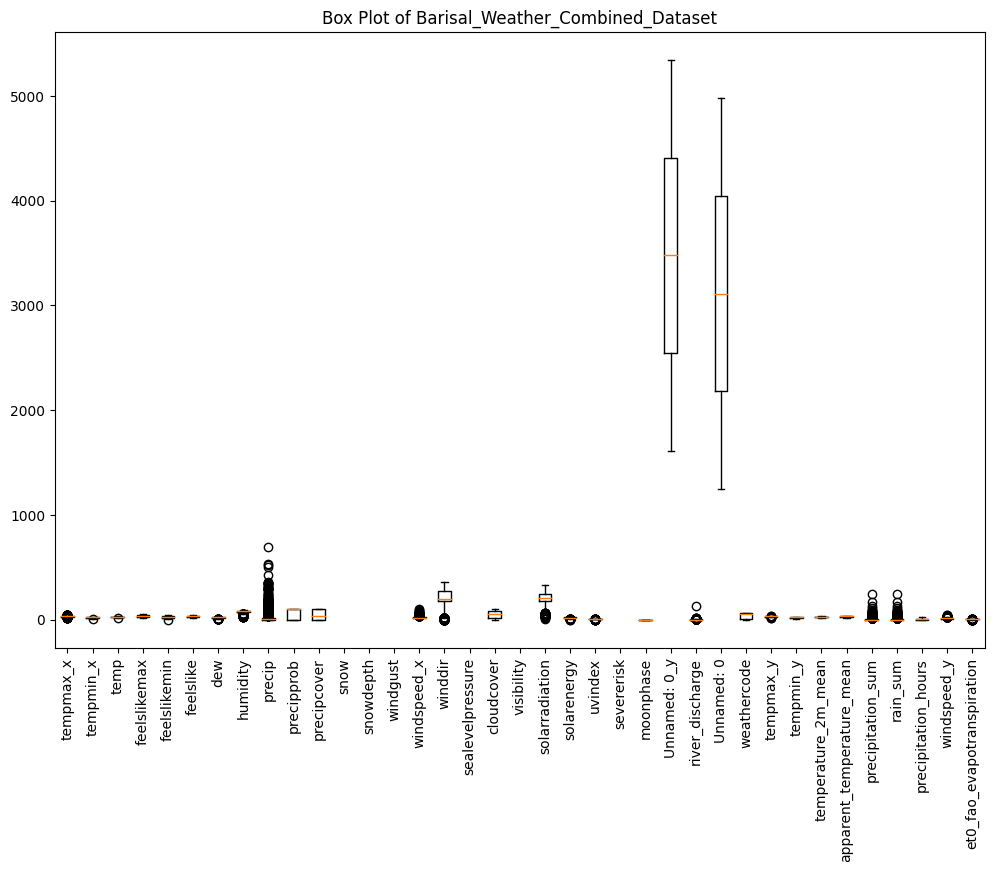

In [44]:
numeric_columns =file.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of Barisal_Weather_Combined_Dataset")
plt.xticks(rotation=90)
plt.show()

In [45]:
columns_having_outliers=['temperature_x','tempmin_x','temp','feelslikemax','feelslike','dew','humidity','precip','windspeed_x',
                         'winddir','solarradiation','solarenergy','unindex','river_discharge','tempmax_y','precipitation_sum','rain_sum',
                         'windspeed_y','et0_fao_evapotranspiration']

In [46]:
def remove_outliers(data, columns_having_outliers, threshold=1.5):
    data_no_outliers = data.copy()
    for column in columns_having_outliers:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]
    return data_no_outliers
df=remove_outliers(file, columns_having_outliers)


Filling Nan values with mean() and mode() such that mean() for "int" or "float" data type and mode() for "object" data type:

In [47]:
for column in df.columns:
    if any(df[column].isnull()):
        if df[column].dtype=='int' or df[column].dtype=='float':
                 df[column].fillna(df[column].mean(),inplace=True)
        elif df[column].dtype=='object':
                 df[column].fillna(df[column].mode().iloc[0],inplace=True)
df.isnull().sum()

datetime                      0
name                          0
tempmax_x                     0
tempmin_x                     0
temp                          0
feelslikemax                  0
feelslikemin                  0
feelslike                     0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
preciptype                    0
snow                          0
snowdepth                     0
windgust                      0
windspeed_x                   0
winddir                       0
sealevelpressure              0
cloudcover                    0
visibility                    0
solarradiation                0
solarenergy                   0
uvindex                       0
severerisk                    0
sunrise                       0
sunset                        0
moonphase                     0
conditions                    0
description                   0
icon    

Data Preprocessing:


In [48]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
datetime,,,,,,,,,,,,,,,,,,,,,
2023-08-17,Barisal,34.0,27.3,30.0,45.0,31.4,36.7,25.8,79.2,10.3,...,61,31.8,26.7,29.1,35.1,2.8,2.8,9.0,18.9,3.99
2023-08-15,Barisal,33.6,26.9,29.6,43.8,30.0,35.8,25.6,80.5,16.5,...,63,31.6,26.2,28.1,34.7,15.3,15.3,14.0,10.3,3.11
2023-08-03,Barisal,32.5,26.4,28.8,39.6,26.4,33.9,25.5,83.4,7.9,...,53,30.9,26.3,28.2,33.8,4.8,4.8,14.0,13.5,2.65
2023-08-02,Barisal,31.9,27.1,28.8,40.2,31.1,34.9,25.9,84.4,11.6,...,61,29.5,26.6,27.8,32.7,8.7,8.7,16.0,21.0,2.11
2023-07-30,Barisal,34.8,27.3,30.6,47.3,31.9,38.2,26.2,78.8,1.2,...,63,33.0,27.0,29.9,36.8,5.5,5.5,7.0,13.8,4.58


<h3> Univariate Analysis</h3>
Summary statistics


In [49]:
df.describe()

,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
count,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,...,2669.000000,2669.00000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000
mean,30.844661,22.584676,26.248070,35.569801,23.996178,29.382315,21.804309,78.288985,5.657999,57.999251,...,30.925440,30.09764,22.117010,25.818471,29.629412,2.229524,2.229524,3.903335,12.131323,3.829745
std,3.568954,5.105785,3.723062,6.893284,6.748685,6.332225,4.735764,8.091953,8.664529,49.365221,...,27.677681,3.30783,4.694344,3.747088,5.799989,3.611859,3.611859,5.129911,4.173745,0.976668
min,19.800000,8.700000,16.000000,19.800000,8.700000,16.000000,7.500000,53.700000,0.000000,0.000000,...,0.000000,20.80000,9.900000,15.500000,13.800000,0.000000,0.000000,0.000000,4.300000,0.890000
25%,28.800000,18.400000,23.600000,29.400000,18.400000,23.600000,18.300000,73.100000,0.000000,0.000000,...,1.000000,27.90000,18.100000,22.900000,24.800000,0.000000,0.000000,0.000000,9.000000,3.160000
50%,31.300000,24.600000,28.000000,36.900000,24.600000,30.900000,23.400000,79.800000,0.800000,100.000000,...,51.000000,30.70000,24.200000,27.300000,32.100000,0.200000,0.200000,1.000000,11.100000,3.700000
75%,33.200000,26.900000,29.000000,41.300000,30.700000,34.900000,25.900000,84.700000,8.100000,100.000000,...,55.000000,32.40000,26.000000,28.600000,34.100000,3.200000,3.200000,7.000000,14.500000,4.450000
max,42.300000,29.500000,33.200000,53.000000,39.800000,41.500000,28.100000,95.100000,38.500000,100.000000,...,65.000000,38.00000,29.100000,32.200000,39.000000,15.600000,15.600000,24.000000,24.800000,6.350000


In [50]:
df.columns

Index(['name', 'tempmax_x', 'tempmin_x', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed_x', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'stations', 'Unnamed: 0_y', 'river_discharge', 'Unnamed: 0',
       'weathercode', 'tempmax_y', 'tempmin_y', 'temperature_2m_mean',
       'apparent_temperature_mean', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'windspeed_y', 'et0_fao_evapotranspiration'],
      dtype='object')

Rainfall Vs River_Discharge:

In [51]:
fig = px.histogram(df, x='river_discharge', y='rain_sum')
fig.show()


Histograms for conditions:

In [52]:
categorical_cols = file.select_dtypes(include=['object']).columns
for col in categorical_cols[3:]:
    if col!='description' and col!='stations':
            fig = px.histogram(file,x=col,nbins=30,title=f'Distribution of {col}')
            fig.update_layout(width=800, height=600)
            fig.show()

<h3>Time Series Analysis:</h3>
Line plot of time series data

In [53]:
fig = px.line(df, x=df.index, y='et0_fao_evapotranspiration', title='Evapotranspiration Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Evapotranspiration')
fig.show()

Time Series Data Columns (e.g., 'feelslike'):

---

How does the time of feelslike changes over time (line plot)?

In [58]:
fig = px.line(df, x=df.index, y='feelslike', title='Temperature Feelslike Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='feelslike')
fig.show()

Correlation Analysis:

To avoid messy heatmap. I am doing column slicing for every 5 columns that's why we have 9 heatmaps.


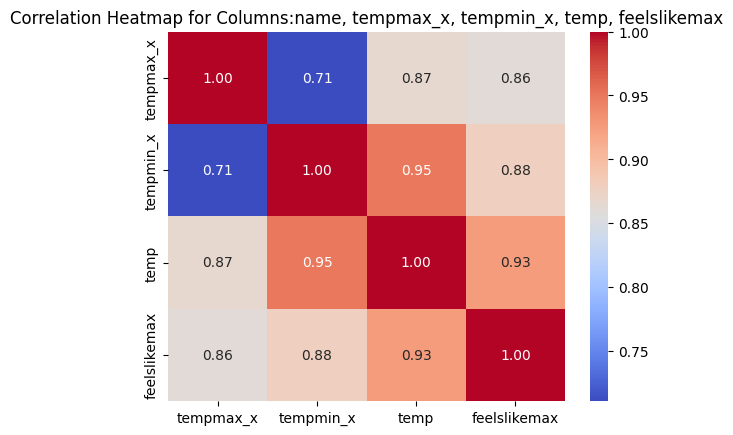

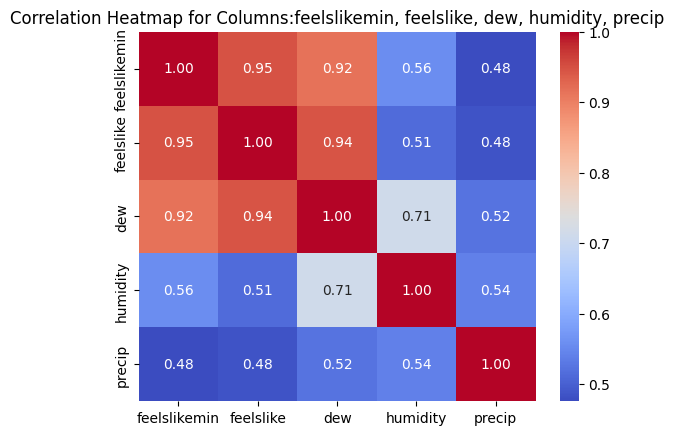

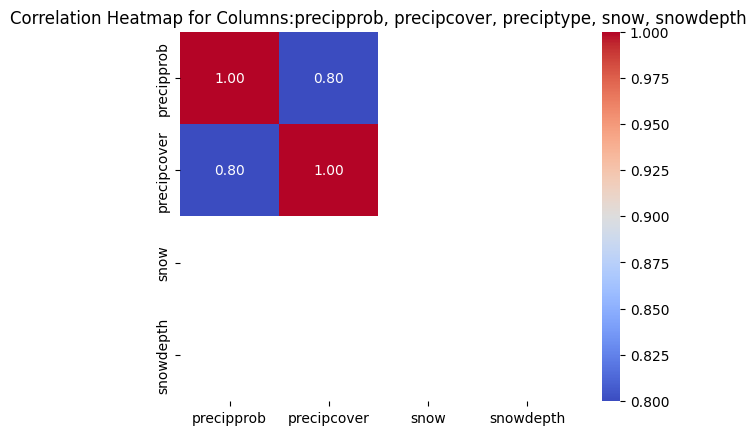

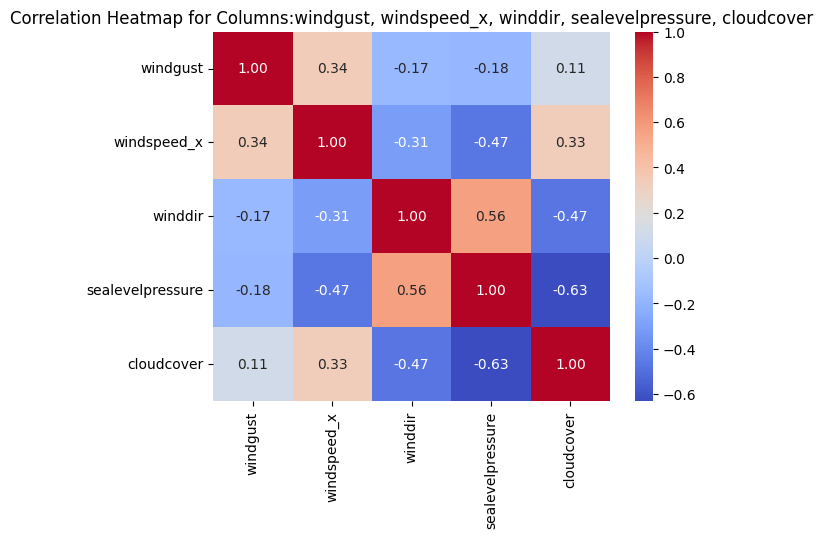

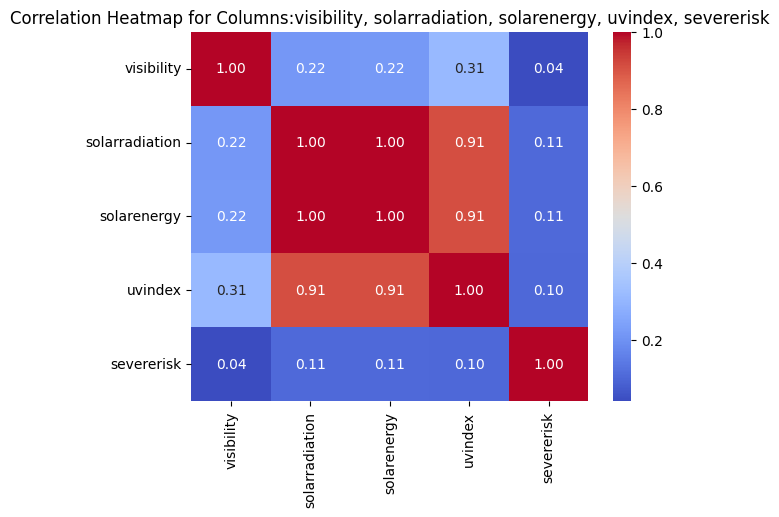

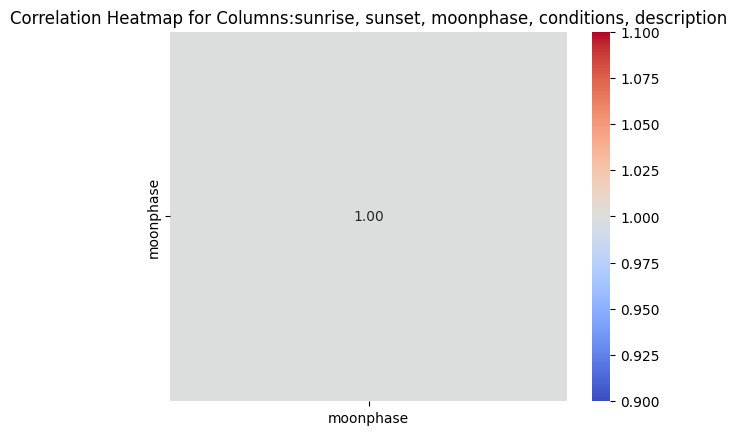

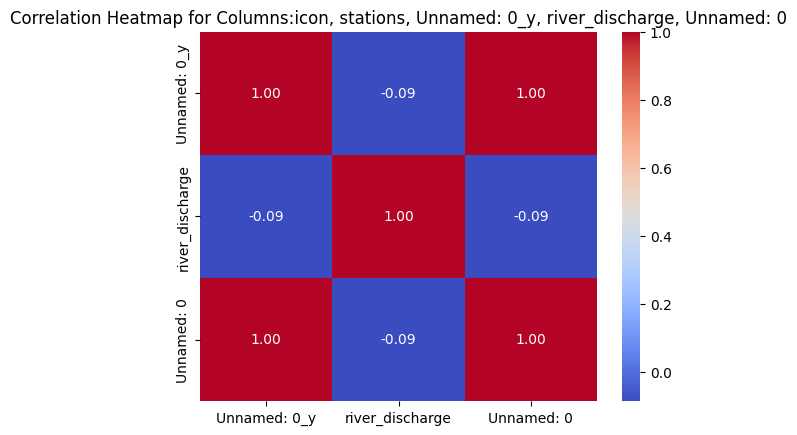

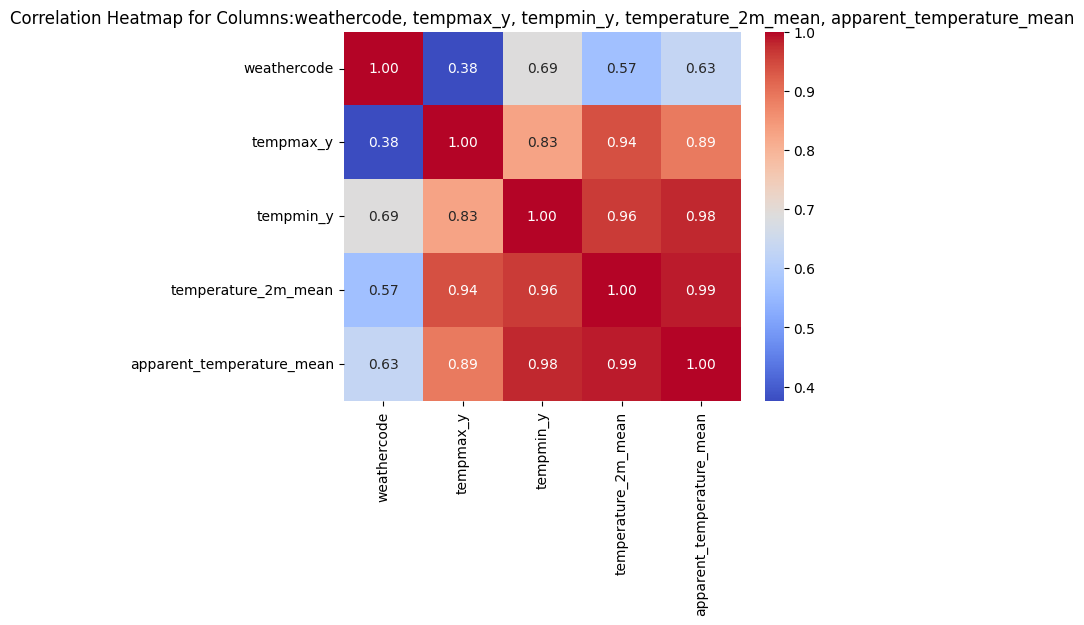

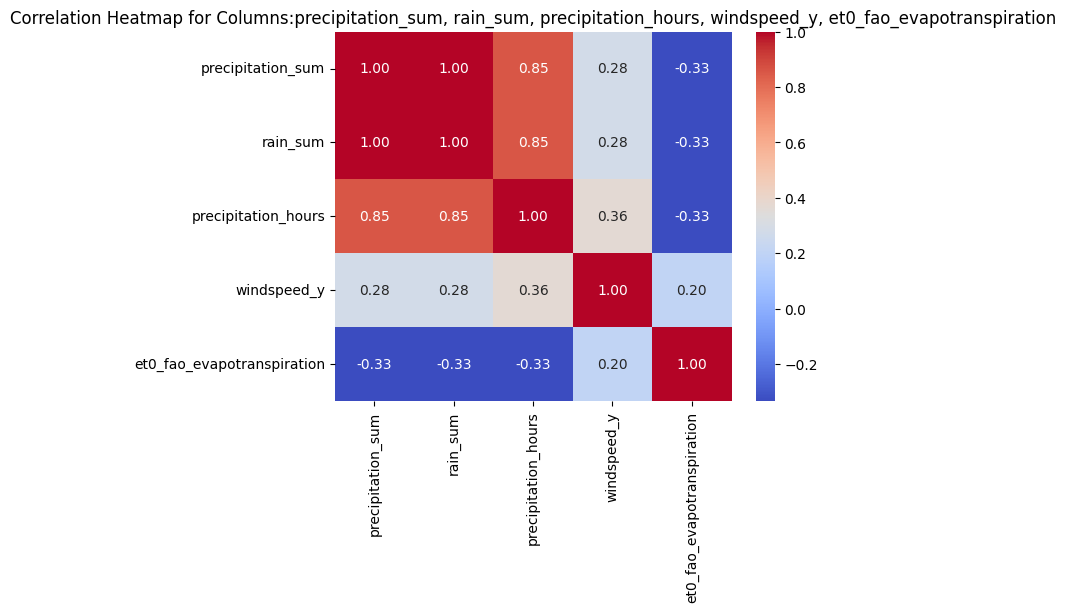

In [ ]:
columns =df.columns
for i in range(0,len(columns),5):
    subset_columns =columns[i:i+5]
    subset_df= df[subset_columns]
    correlation_matrix= subset_df.corr()
    sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title(f'Correlation Heatmap for Columns:{", ".join(subset_columns)}')
    plt.show()


Most Common Weather Conditions:

In [60]:
weather_conditions = df['conditions'].value_counts().reset_index()
weather_conditions.columns = ['Condition', 'Count']
weather_conditions = weather_conditions.sort_values(by='Count', ascending=False)
fig = px.pie(weather_conditions, names='Condition', values='Count', title='Most Common Weather Conditions')
fig.show()
